# **Which country should you move to?**
### An expoloration of the world through Kaggle data. Files used for study were downloaded April 2023.

---

##### **Countries in the World by Population 2022** (UPDATED A YEAR AGO)
Columns of data include (2020) population, yearly change, density ((P/Km²), migrants, fertility, and median age.

##### **World Happiness Report 2023** (UPDATED 6 MONTHS AGO)
Columns of data include ladder (happiness) score, GDP per capita, social support, and healthy life expectancy.

##### **The Human Freedom Index** (UPDATED 8 MONTHS AGO)
Columns of data include human freedom score, personal freedom score, and economic freedom score. Note: Human freedom score is based on personal, civil, and economic freedom scores.

##### **World Economic Data** (UPDATED 13 MONTHS AGO)
Columns of data include annual income, corruption index, cost index, purchasing power index, tourists (per million), and unemployment rate. Note: Cost index and purchasing power index rate the United States as 100 and every other value is relative to the United States.


---


These datasets will shed light on countries suitable for long term stay using criteria of comfort and safety. Unfortunately, not all countries/territories in the dataset have data from each report.

## Downloading the Dataset

Below you will find the process to access the data:
* the url of the dataset was identified
* downloaded (using the API key from Kaggle)
* extracted as files

Let's begin by downloading the data, and listing the files within the dataset.

In [8]:
!pip install jovian opendatasets --upgrade --quiet

In [9]:
dataset_url_1 = 'https://www.kaggle.com/datasets/anandhuh/countries-in-the-world-by-population-2022' 
dataset_url_2 = 'https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023' 
dataset_url_3 = 'https://www.kaggle.com/datasets/madhurpant/world-economic-data?select=unemployment.csv' 
dataset_url_4 = 'https://www.kaggle.com/datasets/gsutters/the-human-freedom-index' 

In [10]:
import opendatasets as od
od.download(dataset_url_1)
od.download(dataset_url_2)
od.download(dataset_url_3)
od.download(dataset_url_4)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sarahvitvitskiy
Your Kaggle Key: ········


100%|██████████████████████████████████████| 6.52k/6.52k [00:00<00:00, 1.13MB/s]


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

 sarahvitvitskiy
Your Kaggle Key: ········


100%|███████████████████████████████████████| 7.15k/7.15k [00:00<00:00, 821kB/s]


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

 sarahvitvitskiy
Your Kaggle Key: ········


100%|███████████████████████████████████████| 5.04k/5.04k [00:00<00:00, 505kB/s]


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

 sarahvitvitskiy
Your Kaggle Key: ········


100%|██████████████████████████████████████| 3.04M/3.04M [00:00<00:00, 14.0MB/s]

The dataset has been downloaded and extracted.

In [11]:
data_dir_1 = './countries-in-the-world-by-population-2022'
data_dir_2 = './world-happiness-report-2023'
data_dir_3 = './world-economic-data'
data_dir_4 = './the-human-freedom-index'

In [12]:
import os
os.listdir(data_dir_1)
os.listdir(data_dir_2)
os.listdir(data_dir_3)
os.listdir(data_dir_4)

['hfi_cc_2019.csv',
 'hfi_cc_2018.csv',
 'hfi_cc_2020.csv',
 'hfi_cc_2021.csv',
 'hfi_cc_2022.csv']

## Data Preparation and Cleaning

Below you will find the process to prepare and clean the data:
* importing numpy and pandas library
* reading all csv files that were extracted
* using the list, shape, and head functions to get a sense of the dataframe
* renaming, merging, reordering dataframes to view chosen criteria
* deciding to leave null data cells

Note: It was necessary to research pseudonyms of countries and merge rows of data manually. For example, Myanmar and Burma refer to the same country but had individual rows of data in the dataframe; a sum of the their columns was executed and assigned Myanmar (updated). Manually, "duplicates" were deleted.

In [18]:
import numpy as np
import pandas as pd

In [24]:
df_1 = pd.read_csv('countries-in-the-world-by-population-2022/world_population.csv')
df_2 = pd.read_csv('the-human-freedom-index/hfi_cc_2022.csv')
df_3a = pd.read_csv('world-economic-data/corruption.csv')
df_3b = pd.read_csv('world-economic-data/cost_of_living.csv')
df_3c = pd.read_csv('world-economic-data/tourism.csv')
df_3d = pd.read_csv('world-economic-data/unemployment.csv')
df_4 = pd.read_csv('world-happiness-report-2023/WHR2023.csv')

In [25]:
df_3 = pd.merge(pd.merge(pd.merge(df_3a, df_3b, how='outer'), df_3c, how='outer'), df_3d, how='outer')

In [26]:
# list(df_1)
# list(df_2)
# list(df_3)
# list(df_4)

new_df_1 = df_1[['Country/Other', 'Population (2020)', 'Yearly Change', 'Density (P/Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age',]]
new_df_2 = df_2[['year', 'countries', 'hf_score', 'pf_score', 'ef_score']]
new_df_3 = df_3[['country', 'annual_income', 'corruption_index', 'cost_index','purchasing_power_index', 'tourists_in_millions', 'unemployment_rate']]
new_df_4 = df_4[['Country name', 'Ladder score', 'Logged GDP per capita', 'Social support','Healthy life expectancy',]]

In [27]:
# list(new_df_1)
# list(new_df_2)
# list(new_df_3)
# list(new_df_4)

# new_df_1.shape # 201 rows, includes independent territories
# new_df_2.shape #165 rows, dropped all rows that did not contain the year 2020, then dropped year column
# new_df_3.shape #159 rows, merged tables from world economic data using how='outer' instead of on='country'
# new_df_4.shape # 137 rows

# new_df_2.head(5)
# new_df_2.tail(5)
new_df_2.drop(new_df_2[new_df_2['year'] != 2020].index, inplace = True)
new_df_2.drop(labels=['year'], axis=1, inplace=True)

new_df_1.rename(columns={'Country/Other': 'Country', 'Population (2020)': 'Population', 'Migrants (net)': 'Migrants', 'Yearly Change': 'YearlyChange', 'Density (P/Km²)': 'Density', 'Fert. Rate': 'Fertility', 'Med. Age': 'MedianAge'}, inplace=True)
new_df_2.rename(columns={'countries': 'Country', 'hf_score': 'HumanF', 'pf_score': 'PersonalF', 'ef_score': 'EconomicF'}, inplace=True)
new_df_3.rename(columns={'country': 'Country', 'annual_income': 'Income', 'corruption_index': 'Corruption', 'cost_index': 'Cost', 'purchasing_power_index': 'PurchasingPower', 'tourists_in_millions': 'Tourists', 'unemployment_rate': 'Unemployment'}, inplace=True)
new_df_4.rename(columns={'Country name': 'Country', 'Ladder score': 'Happiness', 'Logged GDP per capita': 'GDP', 'Social support': 'SocialSupport', 'Healthy life expectancy': 'LifeExpectancy'}, inplace=True)

/var/folders/ty/47hwlvpd0l18hr2s197vqd4h0000gn/T/ipykernel_75535/3475537619.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2.drop(new_df_2[new_df_2['year'] != 2020].index, inplace = True)
/var/folders/ty/47hwlvpd0l18hr2s197vqd4h0000gn/T/ipykernel_75535/3475537619.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2.drop(labels=['year'], axis=1, inplace=True)
/var/folders/ty/47hwlvpd0l18hr2s197vqd4h0000gn/T/ipykernel_75535/3475537619.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [28]:
combined_df = pd.merge(pd.merge(pd.merge(new_df_1, new_df_2, how='outer'), new_df_3, how='outer'), new_df_4, how='outer')

In [29]:
# list(combined_df)
df = combined_df[['Country', 'Happiness', 'HumanF', 'PersonalF', 'EconomicF', 'LifeExpectancy', 'MedianAge', 'Fertility', 'GDP', 'Income', 'Cost', 'PurchasingPower', 'SocialSupport', 'Unemployment', 'Corruption', 'Population', 'YearlyChange', 'Density', 'Migrants', 'Tourists']]
df.head(5)
df.shape
# df['Country'].unique() # gave list below
# df.set_index('Country', inplace=True) # decided to not make the country an index because the country column was ommitted in some print cases

(242, 20)

#### Below is a list of the Country column in the dataframe. The bolded items are potential "duplicates" under pseudonyms.
'Afghanistan',
'Albania', 
'Algeria', 
'Angola',
'Antigua and Barbuda', 
'Argentina', 
'Armenia', 
'Aruba',
'Australia', 
'Austria', 
'Azerbaijan', 
'Bahamas', 
'Bahrain',
'Bangladesh', 
'Barbados', 
'Belarus', 
'Belgium', 
'Belize', 
'Benin',
'Bhutan', 
'Bolivia', 
'Bosnia and Herzegovina', 
'Botswana',
'Brazil', 
'Brunei', 
'Bulgaria', 
'Burkina Faso', 
'Burundi',
'Cabo Verde', 
'Cambodia', 
'Cameroon', 
'Canada',
'Central African Republic', 
'Chad', 
'Channel Islands', 
'Chile',
'China', 
'Colombia', 
'Comoros', 
'Congo', 
'Costa Rica', 
'Croatia',
'Cuba', 
'Curaçao', 
'Cyprus', 
'Czech Republic (Czechia)',
"Côte d'Ivoire", 
'DR Congo', 
'Denmark', 
'Djibouti',
'Dominican Republic', 
'Ecuador', 
'Egypt', 
'El Salvador',
'Equatorial Guinea', 
'Eritrea', 
'Estonia', 
'Eswatini', 
'Ethiopia',
'Fiji', 
'Finland', 
'France', 
'French Guiana', 
'French Polynesia',
'Gabon', 
'Gambia', 
'Georgia', 
'Germany', 
'Ghana', 
'Greece',
'Grenada', 
'Guadeloupe', 
'Guam', 
'Guatemala', 
'Guinea',
'Guinea-Bissau', 
'Guyana', 
'Haiti', 
'Honduras', 
'Hong Kong',
'Hungary', 
'Iceland', 
'India', 
'Indonesia', 
'Iran', 
'Iraq',
'Ireland', 
'Israel', 
'Italy', 
'Jamaica', 
'Japan', 
'Jordan',
'Kazakhstan', 
'Kenya', 
'Kiribati', 
'Kuwait', 
'Kyrgyzstan', 
'Laos',
'Latvia', 
'Lebanon', 
'Lesotho', 
'Liberia', 
'Libya', 
'Lithuania',
'Luxembourg', 
'Macao', 
'Madagascar', 
'Malawi', 
'Malaysia',
'Maldives', 
'Mali', 
'Malta', 
'Martinique', 
'Mauritania',
'Mauritius', 
'Mayotte', 
'Mexico', 
'Micronesia', 
'Moldova',
'Mongolia', 
'Montenegro', 
'Morocco', 
'Mozambique', 
'Myanmar',
'Namibia', 
'Nepal', 
'Netherlands', 
'New Caledonia', '
New Zealand',
'Nicaragua', 
'Niger', 
'Nigeria', 
'North Korea', 
'North Macedonia',
'Norway', 
'Oman', 
'Pakistan', 
'Panama', 
'Papua New Guinea',
'Paraguay', 
'Peru', 
'Philippines', 
'Poland', 
'Portugal',
'Puerto Rico', 
'Qatar', 
'Romania', 
'Russia', 
'Rwanda', 
'Réunion',
'Saint Lucia', 
'Samoa', 
'Sao Tome & Principe', 
'Saudi Arabia',
'Senegal', 
'Serbia', 
'Seychelles', 
'Sierra Leone', 
'Singapore',
'Slovakia', 
'Slovenia', 
'Solomon Islands', 
'Somalia',
'South Africa', 
'South Korea', 
'South Sudan', 
'Spain', 
'Sri Lanka',
'St. Vincent & Grenadines', 
'State of Palestine', 
'Sudan',
'Suriname', 
'Sweden', 
'Switzerland', 
'Syria', 
'Taiwan',
'Tajikistan', 
'Tanzania', 
'Thailand', 
'Timor-Leste', 
'Togo',
'Tonga', 
'Trinidad and Tobago', 
'Tunisia', 
'Turkey',
'Turkmenistan', 
'U.S. Virgin Islands', 
'Uganda', 
'Ukraine',
'United Arab Emirates', 
'United Kingdom', 
'United States',
'Uruguay', 
'Uzbekistan', 
'Vanuatu', 
'Venezuela', 
'Vietnam',
'Western Sahara', 
'Yemen', 
'Zambia', 
'Zimbabwe', 
**'Bahamas, The',**
**'Brunei Darussalam',**
**'Congo, Dem. Rep.',**
**'Congo, Rep.',**
**"Cote d'Ivoire",**
**'Czech Republic',**
**Egypt, Arab Rep.',**
**'Gambia, The',**
**'Hong Kong SAR, China',**
**'Iran, Islamic Rep.',**
**'Korea, Rep.',**
**'Kyrgyz Republic',**
**'Lao PDR',**
**'Russian Federation'**
**'Slovak Republic',**
**'Syrian Arab Republic',**
**'Venezuela, RB',**
**'Yemen, Rep.',**
**'Burma',**
**'Central Africa',**
**'Cape Verde',**
**'Congo (Dem. Republic)',**
**'Bermuda',**
**'Cayman Islands',**
**'Turks and Caicos Islands',**
**'Czechia',**
**'Ivory Coast',**
**'Kosovo',**
**'Virgin Islands',**
**'Marshall Islands',**
**'American Samoa',**
**'Principality of Monaco',**
**'Guernsey',**
**'Isle of Man',** 
**'Gibraltar',**
**'Cocos (Keeling) Islands',** 
**'Taiwan Province of China',**
**'Hong Kong S.A.R. of China',**
**'Congo (Brazzaville)',**
**'Turkiye',**
**'Congo (Kinshasa)'**

In [32]:
df = df._append(df.iloc[[11, 201]].sum(min_count=1), ignore_index=True) # Bahamas
df = df._append(df.iloc[[24, 202]].sum(min_count=1), ignore_index=True) # Brunei
df = df._append(df.iloc[[203, 222, 241]].sum(min_count=1), ignore_index=True) # DRC
df = df._append(df.iloc[[204, 239]].sum(min_count=1), ignore_index=True) # Republic of Congo
df = df._append(df.iloc[[46, 205, 227]].sum(min_count=1), ignore_index=True) # Ivory Coast
df = df._append(df.iloc[[45, 206, 226]].sum(min_count=1), ignore_index=True) # Czech Republic
df = df._append(df.iloc[[52, 207]].sum(min_count=1), ignore_index=True) # Egypt
df = df._append(df.iloc[[79, 209, 238]].sum(min_count=1), ignore_index=True) # Hong Kong
df = df._append(df.iloc[[84, 210]].sum(min_count=1), ignore_index=True) # Iran
df = df._append(df.iloc[[132, 211]].sum(min_count=1), ignore_index=True) # North Korea
df = df._append(df.iloc[[96, 212]].sum(min_count=1), ignore_index=True) #Kyrgyzstan
df = df._append(df.iloc[[97, 213]].sum(min_count=1), ignore_index=True) # Laos
df = df._append(df.iloc[[147, 214]].sum(min_count=1), ignore_index=True) # Russia
df = df._append(df.iloc[[159, 215]].sum(min_count=1), ignore_index=True) # Slovakia
df = df._append(df.iloc[[174, 216]].sum(min_count=1), ignore_index=True) # Syria
df = df._append(df.iloc[[195, 217]].sum(min_count=1), ignore_index=True) # Venezuala
df = df._append(df.iloc[[198, 218]].sum(min_count=1), ignore_index=True) # Yemen
df = df._append(df.iloc[[123, 219]].sum(min_count=1), ignore_index=True) # Myanmar
df = df._append(df.iloc[[32, 220]].sum(min_count=1), ignore_index=True) # Central Africa
df = df._append(df.iloc[[28, 221]].sum(min_count=1), ignore_index=True) # Cabo Verde
df = df._append(df.iloc[[175, 237]].sum(min_count=1), ignore_index=True) # Taiwan
df = df._append(df.iloc[[184, 240]].sum(min_count=1), ignore_index=True) # Turkey

df.at[242, 'Country'] = 'Bahamas (updated)'
df.at[243, 'Country'] = 'Brunei (updated)'
df.at[244, 'Country'] = 'DRC (updated)'
df.at[245, 'Country'] = 'Republic of Congo (updated)'
df.at[246, 'Country'] = 'Ivory Coast (updated)'
df.at[247, 'Country'] = 'Czech Republic (updated)'
df.at[248, 'Country'] = 'Egypt (updated)'
df.at[249, 'Country'] = 'Hong Kong (updated)'
df.at[250, 'Country'] = 'Iran (updated)'
df.at[251, 'Country'] = 'North Korea (updated)'
df.at[252, 'Country'] = 'Kyrgyzstan (updated)'
df.at[253, 'Country'] = 'Laos (updated)'
df.at[254, 'Country'] = 'Russia (updated)'
df.at[255, 'Country'] = 'Slovakia (updated)'
df.at[256, 'Country'] = 'Syria (updated)'
df.at[257, 'Country'] = 'Venezuala (updated)'
df.at[258, 'Country'] = 'Yemen (updated)'
df.at[259, 'Country'] = 'Myanmar (updated)'
df.at[260, 'Country'] = 'Central Africa (updated)'
df.at[261, 'Country'] = 'Cape Verde (updated)'
df.at[262, 'Country'] = 'Taiwan (updated)'
df.at[263, 'Country'] = 'Turkey (updated)'

# df.tail(25)
df.drop(labels=[11, 201, 24, 202, 203, 222, 241, 204, 239, 46, 205, 227, 45, 206, 226, 52, 207, 79, 209, 238, 84, 210, 132, 211, 96, 212, 97, 213, 147, 214, 159, 215, 174, 216, 195, 217, 198, 218, 123, 219, 32, 220, 28, 221, 175, 237, 184, 240], axis=0, inplace=True)

In [33]:
df.shape
# df.head()
# df[df.isna().sum(axis = 1) > 10].count() # 46 countries more than 10 (out of 20) missing cells of data

# df2 = df.dropna()
# df2.head(25)
# df2.shape # only 22 rows have complete data

(216, 20)

## Exploratory Analysis and Visualization

Below are several bar charts ranking the top (or bottom) 20 categories for the countries. Note: The top (or bottom) 20 are chosen based on what may be more desirable (e.g. happier residents, fewer residents).


In [34]:
df.head()

,Country,Happiness,HumanF,PersonalF,EconomicF,LifeExpectancy,MedianAge,Fertility,GDP,Income,Cost,PurchasingPower,SocialSupport,Unemployment,Corruption,Population,YearlyChange,Density,Migrants,Tourists
0,Afghanistan,1.859,NaN,NaN,NaN,54.712,18.0,4.6,7.324,500.0,NaN,NaN,0.341,NaN,84.0,38928346.0,2.33,60.0,-62920.0,NaN
1,Albania,5.277,7.67,7.69,7.64,69.150,36.0,1.6,9.567,NaN,52.0,16.7,0.718,NaN,NaN,2877797.0,-0.11,105.0,-14000.0,2.7
2,Algeria,5.329,5.13,5.13,5.12,66.549,29.0,3.1,9.300,3660.0,29.9,17.4,0.855,NaN,67.0,43851044.0,1.85,18.0,-10000.0,NaN
3,Angola,NaN,5.97,6.02,5.91,NaN,17.0,5.6,NaN,1770.0,23.0,10.9,NaN,NaN,71.0,32866272.0,3.27,26.0,6413.0,NaN
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,34.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97929.0,0.84,223.0,0.0,NaN


In [35]:
df.describe()

,Happiness,HumanF,PersonalF,EconomicF,LifeExpectancy,MedianAge,Fertility,GDP,Income,Cost,PurchasingPower,SocialSupport,Unemployment,Corruption,Population,YearlyChange,Density,Migrants,Tourists
count,137.000000,165.000000,165.000000,165.000000,136.000000,201.000000,201.000000,137.000000,110.000000,107.000000,107.000000,137.000000,64.000000,110.000000,2.010000e+02,201.000000,201.000000,201.000000,41.000000
mean,5.539796,6.814485,6.859515,6.749758,64.967632,30.621891,2.692040,9.449796,17195.727273,62.555140,38.150467,0.799073,7.823438,59.200000,3.877661e+07,1.200299,361.711443,-5.442786,11.209756
std,1.139929,1.200267,1.603215,0.893123,5.750390,9.119557,1.264253,1.207302,23741.147397,33.747716,30.588024,0.129222,8.806685,22.170234,1.454245e+08,1.091574,1710.321831,123292.057588,20.819376
min,1.859000,3.300000,2.340000,3.320000,51.530000,15.000000,1.100000,5.527000,240.000000,22.800000,3.400000,0.341000,0.100000,12.000000,9.792900e+04,-2.470000,2.000000,-653249.000000,0.000000
25%,4.724000,5.930000,5.510000,6.150000,60.648500,22.000000,1.700000,8.591000,1470.000000,36.400000,14.050000,0.722000,2.700000,41.750000,1.886198e+06,0.420000,34.000000,-10047.000000,2.500000
50%,5.684000,6.780000,7.070000,6.830000,65.837500,30.000000,2.300000,9.567000,4130.000000,48.900000,25.800000,0.827000,5.000000,69.000000,8.654622e+06,1.080000,89.000000,-960.000000,4.100000
75%,6.334000,7.800000,8.180000,7.430000,69.412500,39.000000,3.600000,10.540000,25410.000000,84.550000,59.100000,0.896000,8.250000,75.000000,2.769102e+07,1.960000,228.000000,9741.000000,8.100000
max,7.804000,8.940000,9.450000,8.590000,77.280000,48.000000,7.000000,11.660000,90360.000000,157.600000,121.100000,0.983000,36.000000,89.000000,1.439324e+09,3.840000,21645.000000,954806.000000,117.100000


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [58]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#FFFFFF'

**Happiness** 

Presumably, one would want to live in a country whose residents reported being the most happy (based on several factors. It appears the many countries in the top 10 are Scandinavian countries. Based in this graphic alone, one may consider moving to the Scandinavian region, preferably Finland.

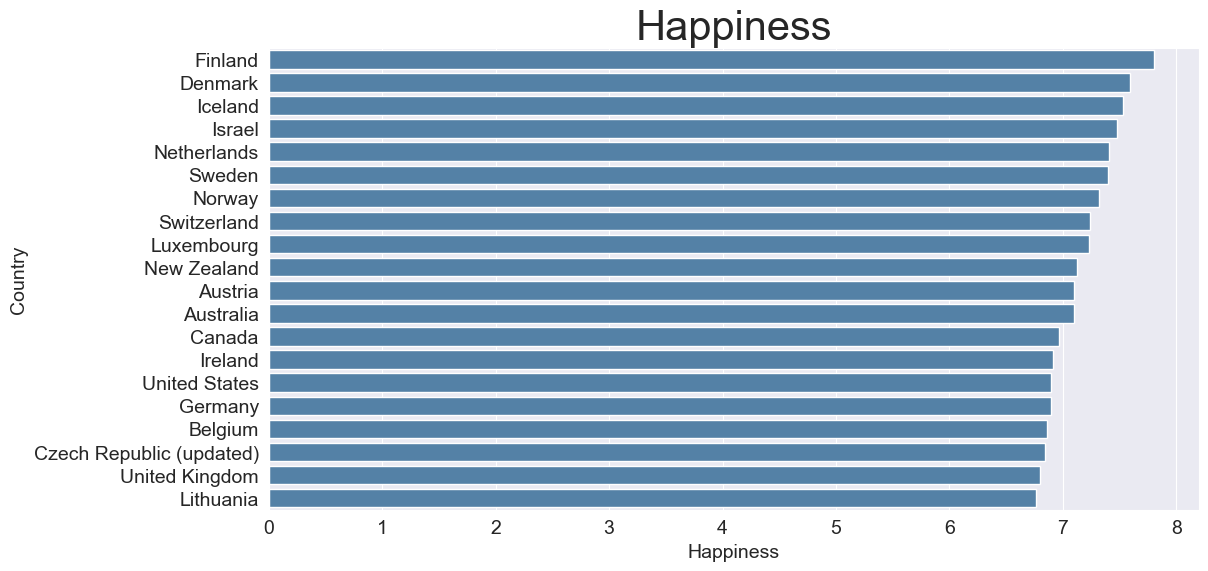

In [59]:
plt.figure(figsize=(12,6))
plt.title('Happiness', fontsize=30)
happy_df = df.sort_values(by='Happiness', ascending=False).head(20)
sns.barplot(x='Happiness', y='Country', color='steelblue', data=happy_df);
# plt.xlabel(None)
# plt.ylabel(None);

**Freedom** 

The first graphic, Human Freedom, is aggregated using Personal and Economic Freedom. Based on the first graphic, one may consider moving to Europe since most of the top 20 countries are European. Note: The happiness score may have considered similar datasets as the freedom score.

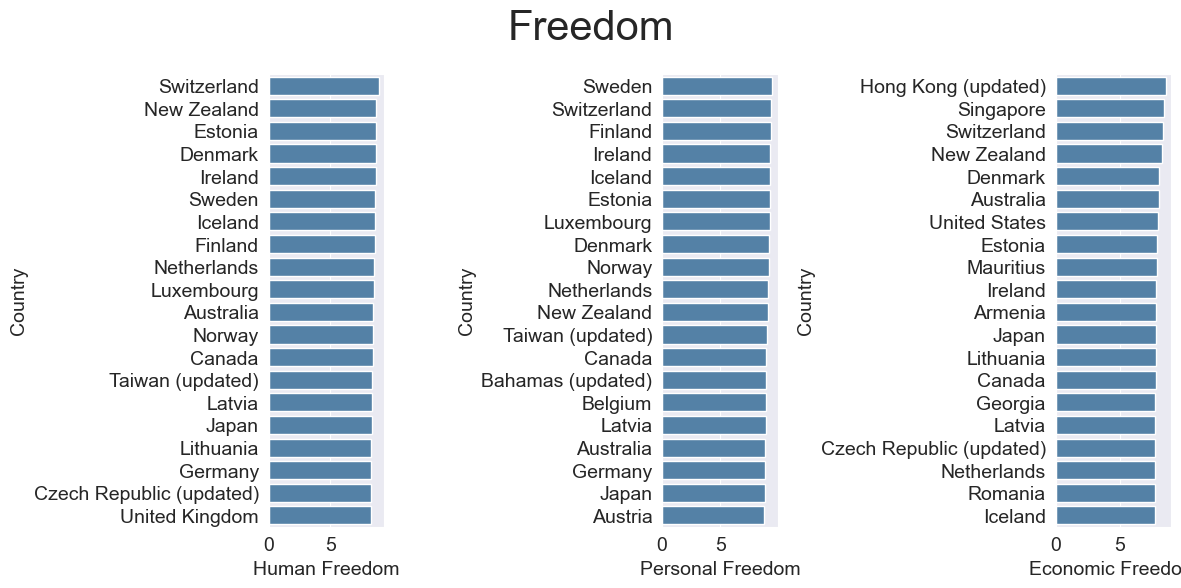

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# axes[0].set_title('Human Freedom')
human_df = df.sort_values(by='HumanF', ascending=False).head(20)
sns.barplot(x='HumanF', y='Country', color='steelblue', data=human_df, ax=axes[0])
axes[0].set(xlabel='Human Freedom')

# axes[1].set_title('Personal Freedom')
personal_df = df.sort_values(by='PersonalF', ascending=False).head(20)
sns.barplot(x='PersonalF', y='Country', color='steelblue', data=personal_df, ax=axes[1])
axes[1].set(xlabel='Personal Freedom')

# axes[2].set_title('Economic Freedom')
economic_df = df.sort_values(by='EconomicF', ascending=False).head(20)
sns.barplot(x='EconomicF', y='Country', color='steelblue', data=economic_df, ax=axes[2])
axes[2].set(xlabel='Economic Freedom')

fig.suptitle('Freedom', fontsize=30)
plt.tight_layout(pad=1);

In [41]:
pd.merge(happy_df, human_df, how="inner")['Country']

0                      Finland
1                      Denmark
2                      Iceland
3                  Netherlands
4                       Sweden
5                       Norway
6                  Switzerland
7                   Luxembourg
8                  New Zealand
9                    Australia
10                      Canada
11                     Ireland
12                     Germany
13    Czech Republic (updated)
14              United Kingdom
15                   Lithuania
Name: Country, dtype: object

**Longevity**

The top 5 countries whose residents live longest are located in Asia (for the most part). Median age and fertility were also considered in this window. The median age of a country can be affected by the life expectancy (i.e. residents are living longer so the median age increases) and fertility (i.e. residents are not having as many children so the median age increases). When the life expectancy is considered with the top 20 countries from before, Asia is not included for consideration.

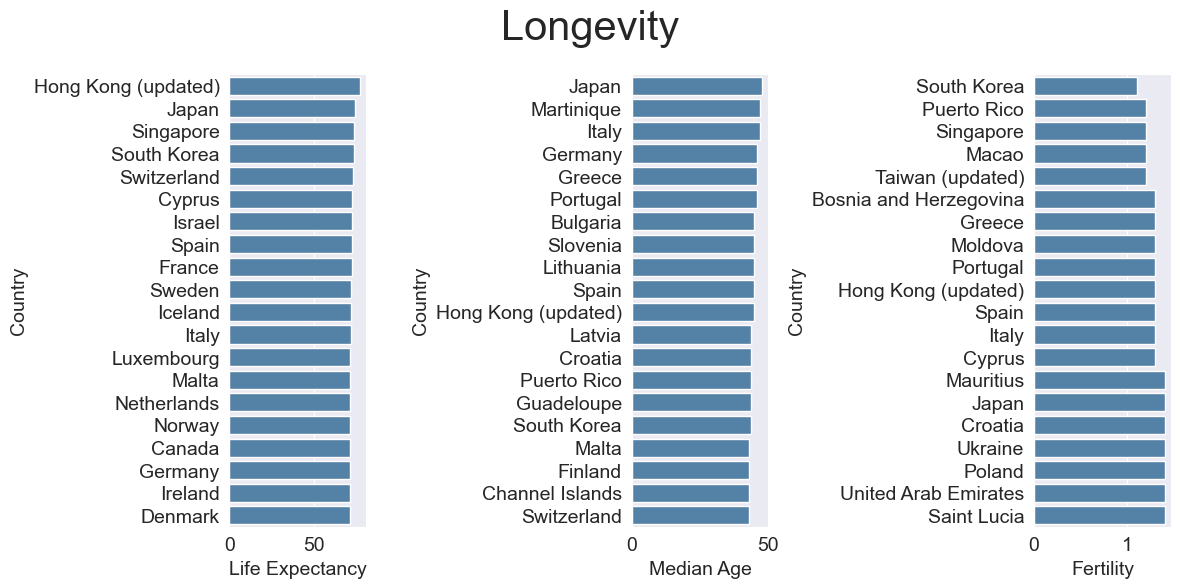

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# axes[0].set_title('Life Expectancy')
life_df = df.sort_values(by='LifeExpectancy', ascending=False).head(20)
sns.barplot(x='LifeExpectancy', y='Country', color='steelblue', data=life_df, ax=axes[0])
axes[0].set(xlabel='Life Expectancy')

# axes[1].set_title('Median Age')
age_df = df.sort_values(by='MedianAge', ascending=False).head(20)
sns.barplot(x='MedianAge', y='Country', color='steelblue', data=age_df, ax=axes[1])
axes[1].set(xlabel='Median Age')

# axes[2].set_title('Fertility')
fertile_df = df.sort_values(by='Fertility', ascending=True).head(20)
sns.barplot(x='Fertility', y='Country', color='steelblue', data=fertile_df, ax=axes[2])
axes[2].set(xlabel='Fertility')

fig.suptitle('Longevity', fontsize=30)
plt.tight_layout(pad=1);

In [43]:
pd.merge(pd.merge(happy_df, human_df, how="inner"), life_df, how='inner')['Country']

0        Denmark
1        Iceland
2    Netherlands
3         Sweden
4         Norway
5    Switzerland
6     Luxembourg
7         Canada
8        Ireland
9        Germany
Name: Country, dtype: object

**Affordability** 

The GDP of the country represents how rich the country is. The following two graphics are based on the United States, where the United States is given a score of 100. Any country who has a value less than 100 means the country is cheaper to live in. The top 20 cheapest countries to live in given cost and/or purchasing power are listed but do not overlap with the previous choices. Below will consider GDP alone. The Netherlands and Germany are the only countries included that are cheapear to live than the United States.

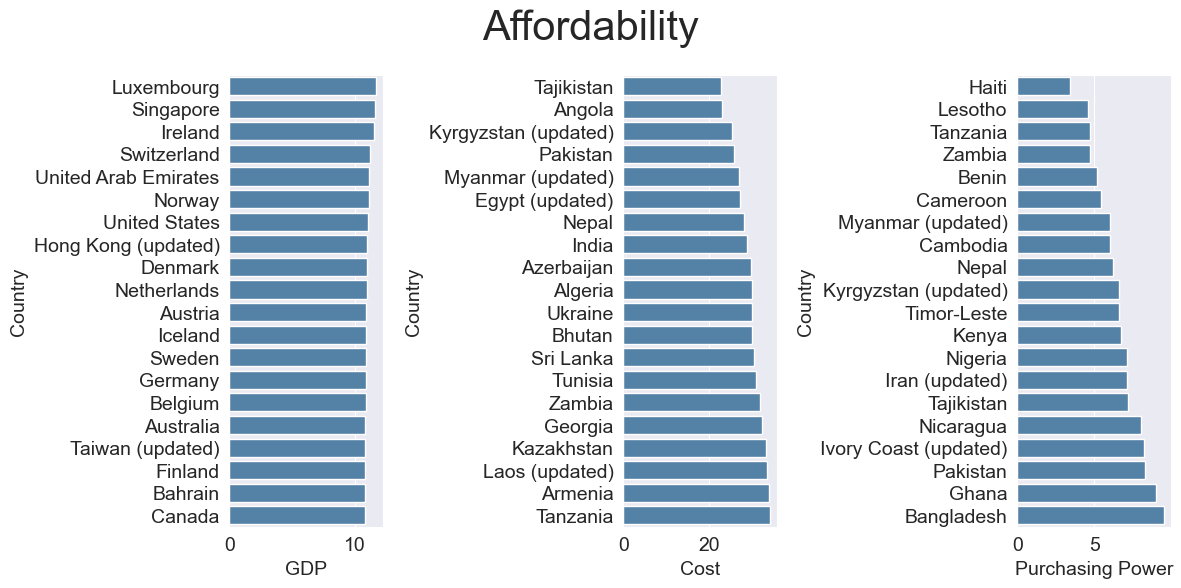

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# axes[0].set_title('GDP')
gdp_df = df.sort_values(by='GDP', ascending=False).head(20)
sns.barplot(x='GDP', y='Country', color='steelblue', data=gdp_df, ax=axes[0])
# axes[0].set(xlabel=None, ylabel=None)

# axes[1].set_title('Cost')
cost_df = df.sort_values(by='Cost', ascending=True).head(20)
sns.barplot(x='Cost', y='Country', color='steelblue', data=cost_df, ax=axes[1])
# axes[1].set(xlabel=None, ylabel=None)

# axes[2].set_title('Purchasing Power')
ppower_df = df.sort_values(by='PurchasingPower', ascending=True).head(20) # closest to 100 ?
sns.barplot(x='PurchasingPower', y='Country', color='steelblue', data=ppower_df, ax=axes[2])
axes[2].set(xlabel='Purchasing Power')

fig.suptitle('Affordability', fontsize=30)
plt.tight_layout(pad=1);

In [45]:
pd.merge(pd.merge(pd.merge(happy_df, human_df, how="inner"), life_df, how='inner'), gdp_df, how='inner')[['Country', 'Cost', 'PurchasingPower']]

,Country,Cost,PurchasingPower
0,Denmark,119.9,80.6
1,Iceland,128.0,71.5
2,Netherlands,99.0,80.8
3,Sweden,109.3,76.5
4,Norway,124.6,95.9
5,Switzerland,142.4,90.1
6,Luxembourg,113.1,101.8
7,Canada,105.6,64.9
8,Ireland,119.8,88.3
9,Germany,92.3,78.5


**Stability**

Social support should be a consideration of a potential resident. Presumably the lower the unemployment rate, the better the country runs. Additionally, The lower the (perception of) corruption, the better living conditions there are. It is possible the Freedom score took similar data as the Corruption value. It appears Germany is the only country from the list that has one of the lowest unemployment values; however, is not present in the other two lists.

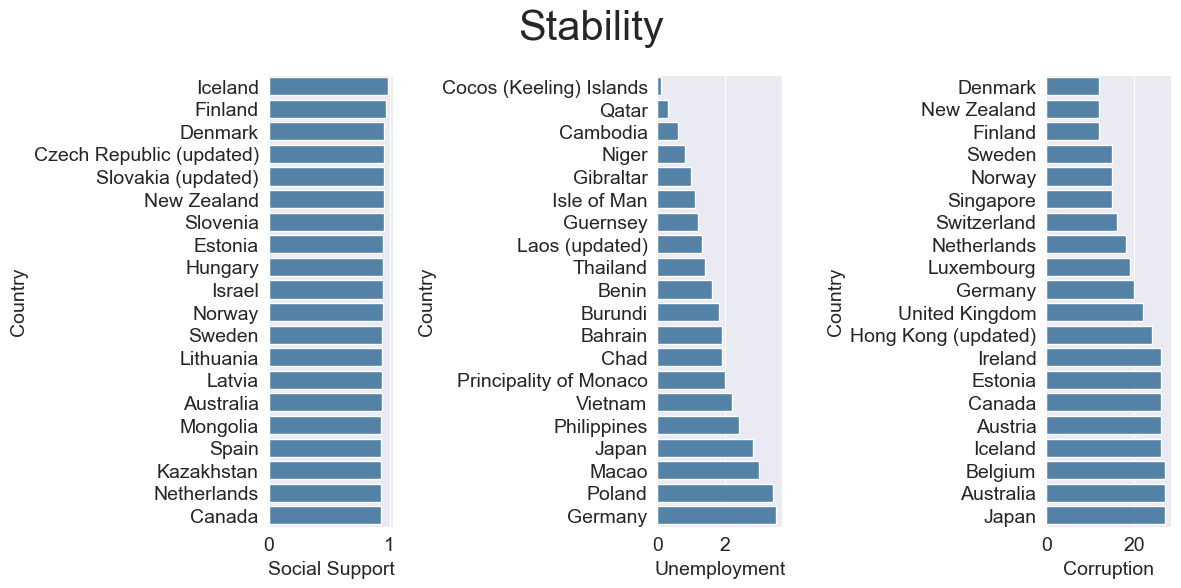

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# axes[0].set_title('Social Support')
support_df = df.sort_values(by='SocialSupport', ascending=False).head(20)
sns.barplot(x='SocialSupport', y='Country', color='steelblue', data=support_df, ax=axes[0])
axes[0].set(xlabel='Social Support')

# axes[1].set_title('Unemployment')
unemploy_df = df.sort_values(by='Unemployment', ascending=True).head(20)
sns.barplot(x='Unemployment', y='Country', color='steelblue', data=unemploy_df, ax=axes[1])
# axes[1].set(xlabel=None, ylabel=None)

# axes[2].set_title('Corruption')
corrupt_df = df.sort_values(by='Corruption', ascending=True).head(20)
sns.barplot(x='Corruption', y='Country', color='steelblue', data=corrupt_df, ax=axes[2])
# axes[2].set(xlabel=None, ylabel=None)

fig.suptitle('Stability', fontsize=30)
plt.tight_layout(pad=1);

In [47]:
stability_df = pd.merge(support_df, corrupt_df, how='inner')
pd.merge(pd.merge(pd.merge(pd.merge(happy_df, human_df, how="inner"), life_df, how='inner'), gdp_df, how='inner'), stability_df, how='inner')['Country']

0        Denmark
1        Iceland
2    Netherlands
3         Sweden
4         Norway
5         Canada
Name: Country, dtype: object

**Population**

**Pt1.** It is possible one would want to live in a country that has the lowest population, stable population (i.e. the amount of people stay about the same on a yearly basis, birth rate is equal to death rate), or have a less dense population. However, the lists above do not have a great overlap. If space is a consideration the following countries should be considered.

**Pt2.** If there are several migrants and tourists in a Country that may be proof the country is desirable by others and may have a more diverse population. Based on the graphics and analysis provided, Canada seems to be the best country to reside in.

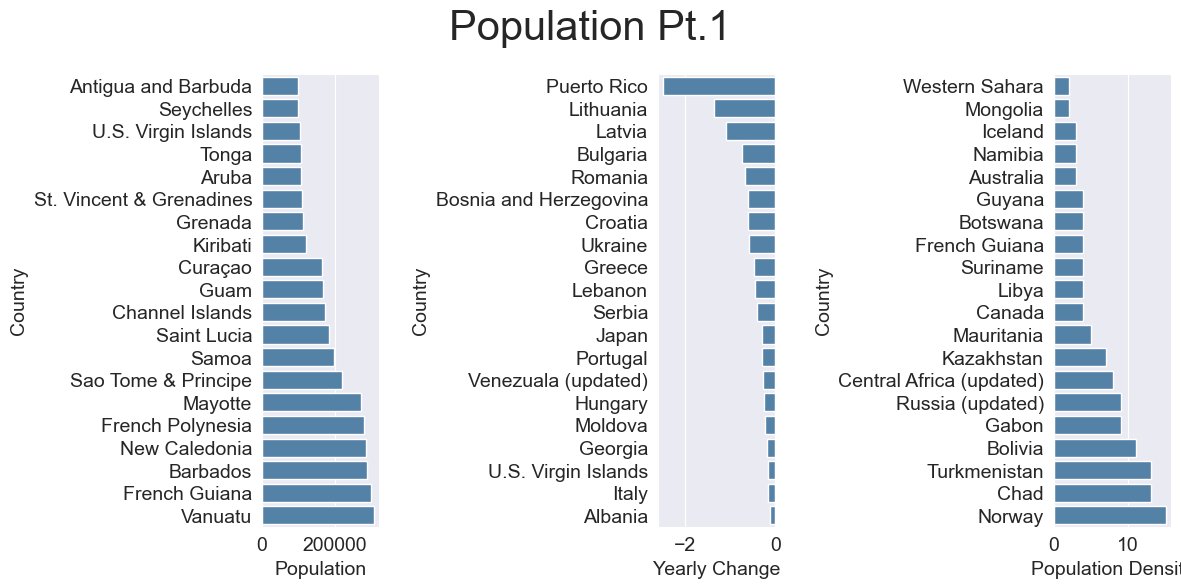

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# axes[0].set_title('Population')
pop_df = df.sort_values(by='Population', ascending=True).head(20)
sns.barplot(x='Population', y='Country', color='steelblue', data=pop_df, ax=axes[0])
# axes[0].set(xlabel=None, ylabel=None)

# axes[1].set_title('YearlyChange')
change_df = df.sort_values(by='YearlyChange', ascending=True).head(20) # closest to zero ?
sns.barplot(x='YearlyChange', y='Country', color='steelblue', data=change_df, ax=axes[1])
axes[1].set(xlabel='Yearly Change')

# axes[2].set_title('Population Density')
density_df = df.sort_values(by='Density', ascending=True).head(20)
sns.barplot(x='Density', y='Country', color='steelblue', data=density_df, ax=axes[2])
axes[2].set(xlabel='Population Density')

fig.suptitle('Population Pt.1', fontsize=30)
plt.tight_layout(pad=1);

In [49]:
pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(happy_df, human_df, how="inner"), life_df, how='inner'), gdp_df, how='inner'), stability_df, how='inner'), density_df, how='inner')['Country']

0    Iceland
1     Norway
2     Canada
Name: Country, dtype: object

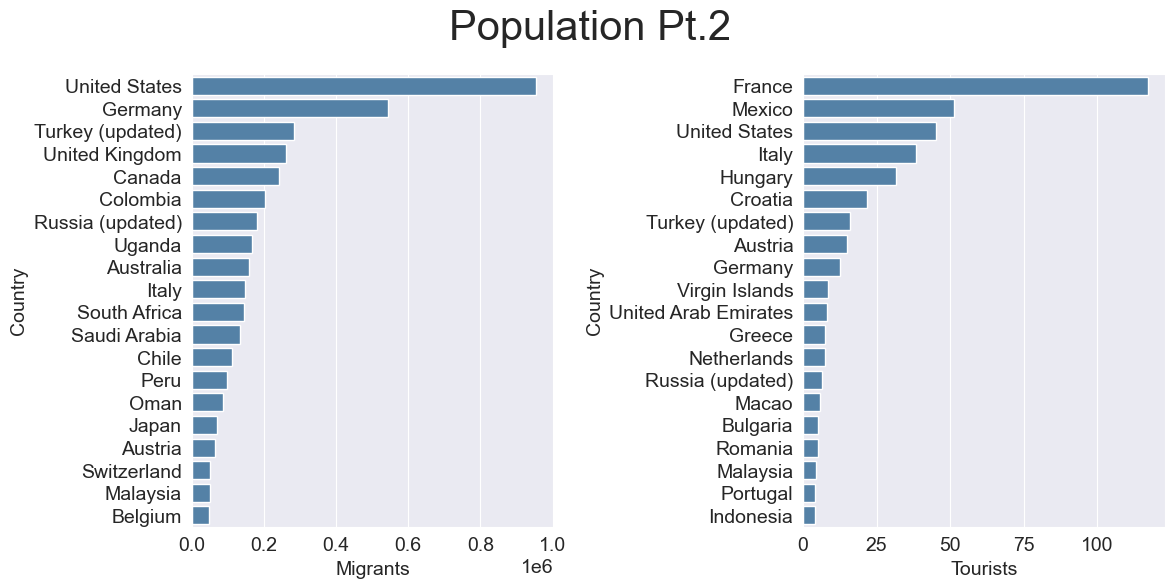

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# axes[0].set_title('Migrants')
migrants_df = df.sort_values(by='Migrants', ascending=False).head(20)
sns.barplot(x='Migrants', y='Country', color='steelblue', data=migrants_df, ax=axes[0])
# axes[0].set(xlabel=None, ylabel=None)

# axes[1].set_title('Tourists')
tourists_df = df.sort_values(by='Tourists', ascending=False).head(20)
sns.barplot(x='Tourists', y='Country', color='steelblue', data=tourists_df, ax=axes[1])
# axes[1].set(xlabel=None, ylabel=None)

fig.suptitle('Population Pt.2', fontsize=30)
plt.tight_layout(pad=1);

In [51]:
# pd.merge(migrants_df, tourists_df, how='inner')['Country']
diversity_df = pd.merge(migrants_df, tourists_df, how='outer')['Country']
pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(happy_df, human_df, how="inner"), life_df, how='inner'), gdp_df, how='inner'), stability_df, how='inner'), density_df, how='inner'), diversity_df, how='inner')['Country']

0    Canada
Name: Country, dtype: object

## Asking and Answering Questions

Below are several questions to consider what factors may depend on one another.


In [52]:
list(df)

['Country',
 'Happiness',
 'HumanF',
 'PersonalF',
 'EconomicF',
 'LifeExpectancy',
 'MedianAge',
 'Fertility',
 'GDP',
 'Income',
 'Cost',
 'PurchasingPower',
 'SocialSupport',
 'Unemployment',
 'Corruption',
 'Population',
 'YearlyChange',
 'Density',
 'Migrants',
 'Tourists']

#### Q1: Is there a positive correlation between Happiness and Social Support?

As the happiness of a country increases, the social support increases. There is a positive, moderate to strong correlation. Those who live in a country with a high happiness score also have high social support.

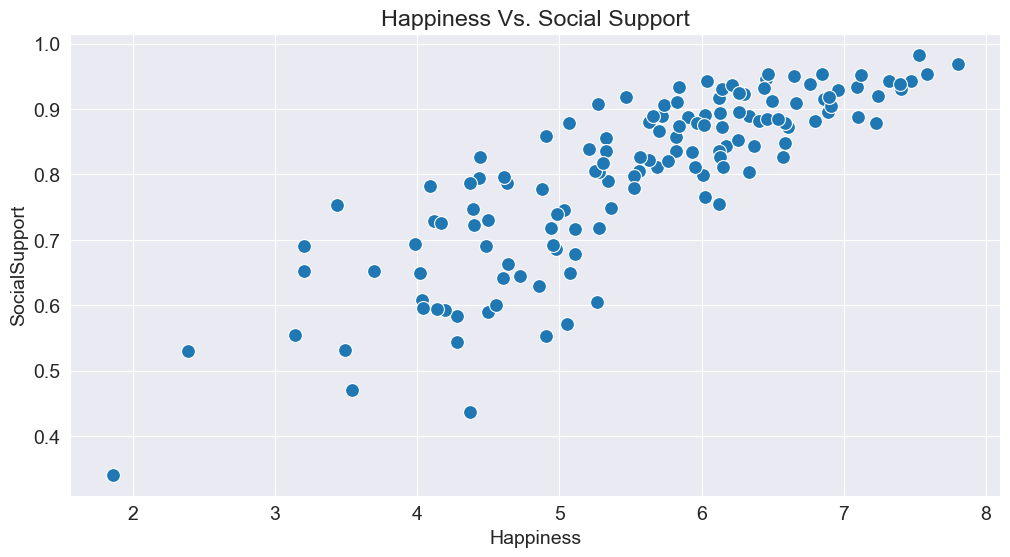

In [66]:
plt.figure(figsize=(12, 6))
plt.title('Happiness Vs. Social Support')

sns.scatterplot(x=df.Happiness, 
                y=df.SocialSupport, 
                s=100);

#### Q2: Is there a negative correlation between Human Freedom and Corruption?

As the human freedom score increases, the corruption decreases. There is a negative, moderate correlation. Those who live in a country with high human freedom also report low corruption.

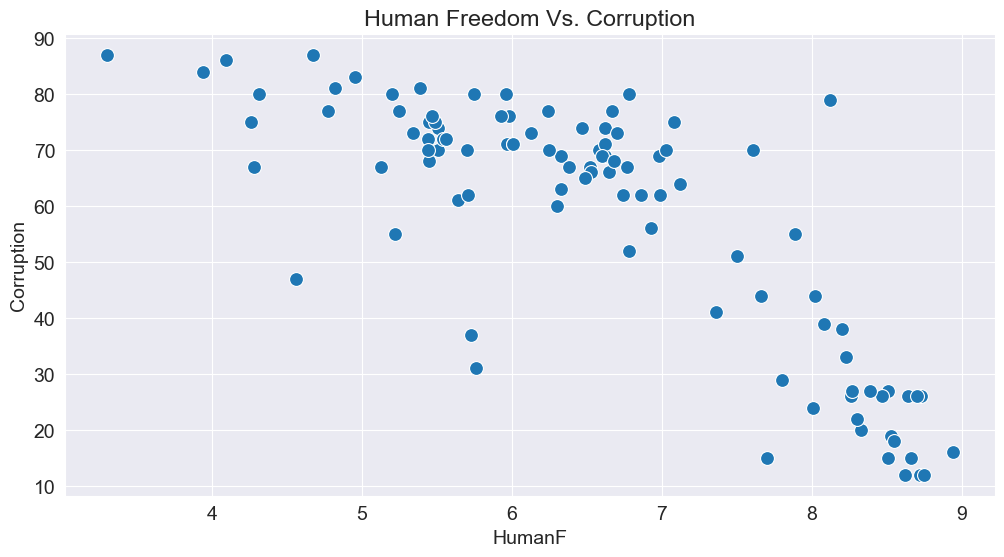

In [67]:
plt.figure(figsize=(12, 6))
plt.title('Human Freedom Vs. Corruption')

sns.scatterplot(x=df.HumanF, 
                y=df.Corruption, 
                s=100);

#### Q3: Is there a negative correlation between GDP and Unemployment?

There does not seem to be a correlation between GDP and unemployment.

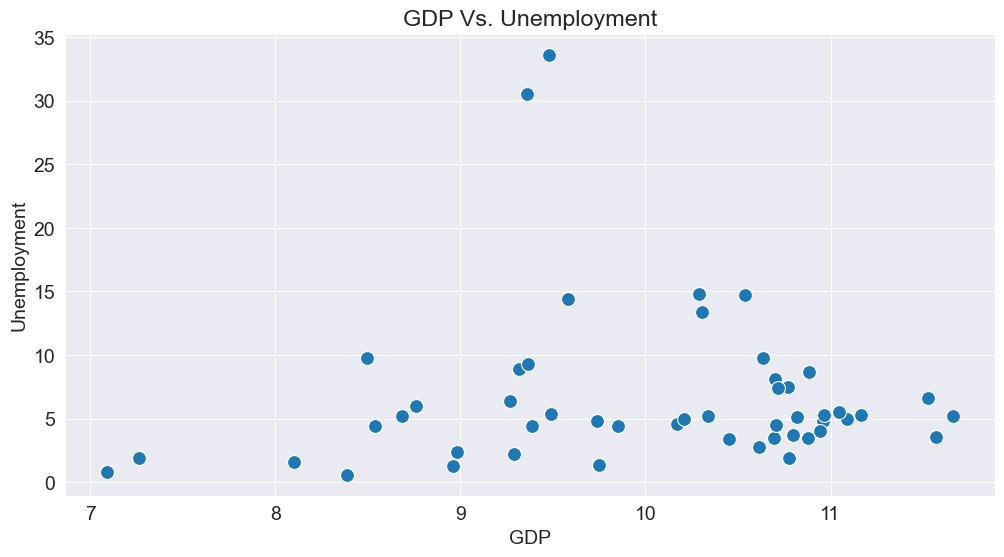

In [68]:
plt.figure(figsize=(12, 6))
plt.title('GDP Vs. Unemployment')

sns.scatterplot(x=df.GDP, 
                y=df.Unemployment, 
                s=100);

#### Q4: Is there a positive correlations between the Population and Migrants?

There does not seem to be a correlation between population and migrants.

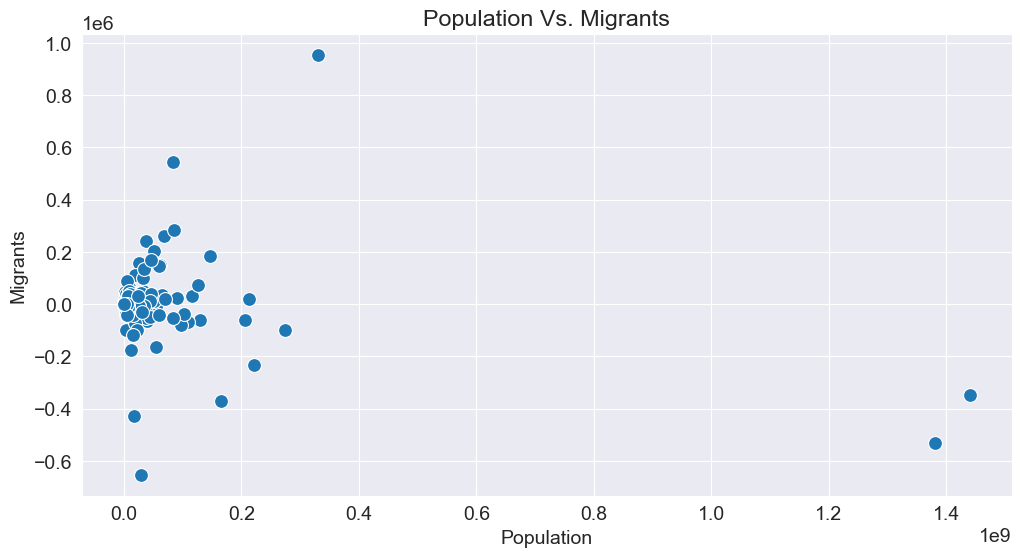

In [69]:
plt.figure(figsize=(12, 6))
plt.title('Population Vs. Migrants')

sns.scatterplot(x=df.Population, 
                y=df.Migrants, 
                s=100);

#### Q5: Is there a positive correlation between Cost and Purchasing Power?

As the cost increases, the purchasing power increases. There is a positive, weak to moderate correlation. The countries who cost less have lower purchasing power.

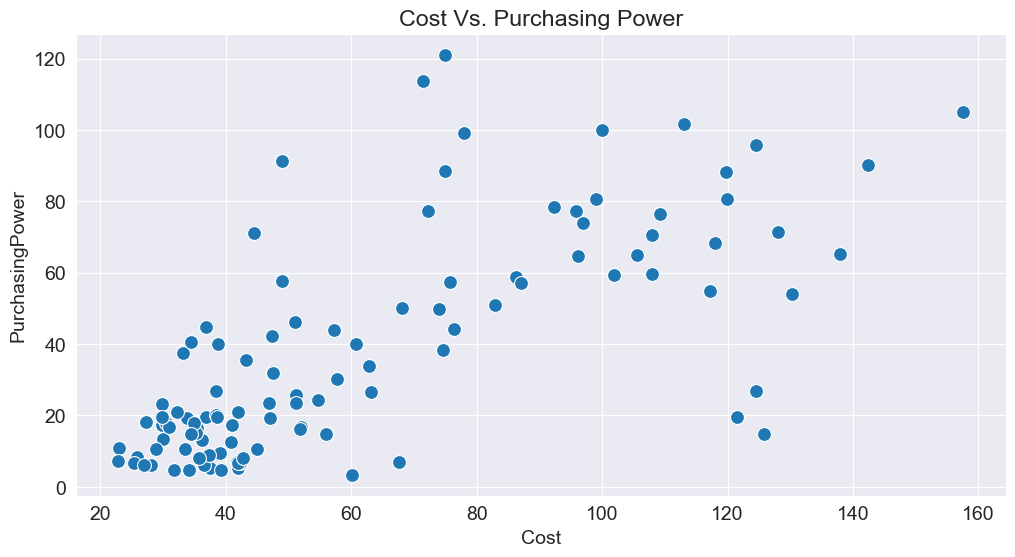

In [70]:
plt.figure(figsize=(12, 6))
plt.title('Cost Vs. Purchasing Power')

sns.scatterplot(x=df.Cost, 
                y=df.PurchasingPower, 
                s=100);

## Inferences and Conclusion

The most important factor of choosing the destination is disposition of the residents (Happiness), followed by freedom, and then cost.
* As the Social Support in a country increases, the Happiness increases. As the Corr
* As the Corruption in a country increases, the Human Freedom decreases.
* Compared to the United States of America, many countries are cheaper to reside.

## References and Future Work
* All data was collected through Kaggle. Including datasets produced by goverment agencies could give more thorough data.

* Gathering complete data (i.e. 195 countries, with no empty cells) would produce more accurate conclusions.

* Data on safety for People of Color or LGBTQ rights would broaden the scope of freedom.